### TO Dataset Credit
#### Diah Dwi Cahyanti


In [1]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_excel('Data/credit.xlsx')
df

,Unnamed: 0,Catatan_kredit,Utang,Jaminan,Pendapatan,Risiko
0,1,buruk,rendah,tidak_ada,0-15,tinggi
1,2,tidak_diketahui,tinggi,tidak_ada,15-35,tinggi
2,3,tidak_diketahui,rendah,tidak_ada,15-35,rendah
3,4,buruk,rendah,tidak_ada,0-15,tinggi
4,5,tidak_diketahui,rendah,ada,>35,rendah
...,...,...,...,...,...,...
115,116,baik,tinggi,ada,15-35,rendah
116,117,baik,tinggi,tidak_ada,15-35,rendah
117,118,baik,tinggi,ada,15-35,rendah
118,119,tidak_diketahui,rendah,tidak_ada,15-35,tinggi


In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Catatan_kredit,Utang,Jaminan,Pendapatan,Risiko
0,buruk,rendah,tidak_ada,0-15,tinggi
1,tidak_diketahui,tinggi,tidak_ada,15-35,tinggi
2,tidak_diketahui,rendah,tidak_ada,15-35,rendah
3,buruk,rendah,tidak_ada,0-15,tinggi
4,tidak_diketahui,rendah,ada,>35,rendah
...,...,...,...,...,...
115,baik,tinggi,ada,15-35,rendah
116,baik,tinggi,tidak_ada,15-35,rendah
117,baik,tinggi,ada,15-35,rendah
118,tidak_diketahui,rendah,tidak_ada,15-35,tinggi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Catatan_kredit  120 non-null    object
 1   Utang           120 non-null    object
 2   Jaminan         120 non-null    object
 3   Pendapatan      120 non-null    object
 4   Risiko          120 non-null    object
dtypes: object(5)
memory usage: 4.8+ KB


In [5]:
df.isna().sum()

Catatan_kredit    0
Utang             0
Jaminan           0
Pendapatan        0
Risiko            0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
# Menggunakan LabelEncoder untuk beberapa kolom
label_encoder = LabelEncoder()

# Kolom yang ingin diubah
columns_to_encode = ['Catatan_kredit', 'Utang', 'Jaminan', 'Pendapatan']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan hasil
print(df)

     Catatan_kredit  Utang  Jaminan  Pendapatan  Risiko
0                 1      0        1           0  tinggi
1                 2      1        1           1  tinggi
2                 2      0        1           1  rendah
3                 1      0        1           0  tinggi
4                 2      0        0           2  rendah
..              ...    ...      ...         ...     ...
115               0      1        0           1  rendah
116               0      1        1           1  rendah
117               0      1        0           1  rendah
118               2      0        1           1  tinggi
119               0      0        1           1  tinggi

[120 rows x 5 columns]


C:\Users\marsha\AppData\Local\Temp\ipykernel_13180\791997051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\marsha\AppData\Local\Temp\ipykernel_13180\791997051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\marsha\AppData\Local\Temp\ipykernel_13180\791997051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Catatan_kredit  120 non-null    int32 
 1   Utang           120 non-null    int32 
 2   Jaminan         120 non-null    int32 
 3   Pendapatan      120 non-null    int32 
 4   Risiko          120 non-null    object
dtypes: int32(4), object(1)
memory usage: 2.9+ KB


In [8]:
#Cek deskripsi stastik data
df.describe()

,Catatan_kredit,Utang,Jaminan,Pendapatan
count,120.000000,120.000000,120.000000,120.000000
mean,0.866667,0.516667,0.533333,1.150000
std,0.808914,0.501817,0.500979,0.752028
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000
max,2.000000,1.000000,1.000000,2.000000


In [9]:

# Making a list of all categorical variables
cat_col = [
    "Catatan_kredit",
    "Utang",
    "Jaminan",
    "Pendapatan",
    "Risiko",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

0    48
1    40
2    32
Name: Catatan_kredit, dtype: int64
----------------------------------------
1    62
0    58
Name: Utang, dtype: int64
----------------------------------------
1    64
0    56
Name: Jaminan, dtype: int64
----------------------------------------
1    50
2    44
0    26
Name: Pendapatan, dtype: int64
----------------------------------------
tinggi    62
rendah    58
Name: Risiko, dtype: int64
----------------------------------------


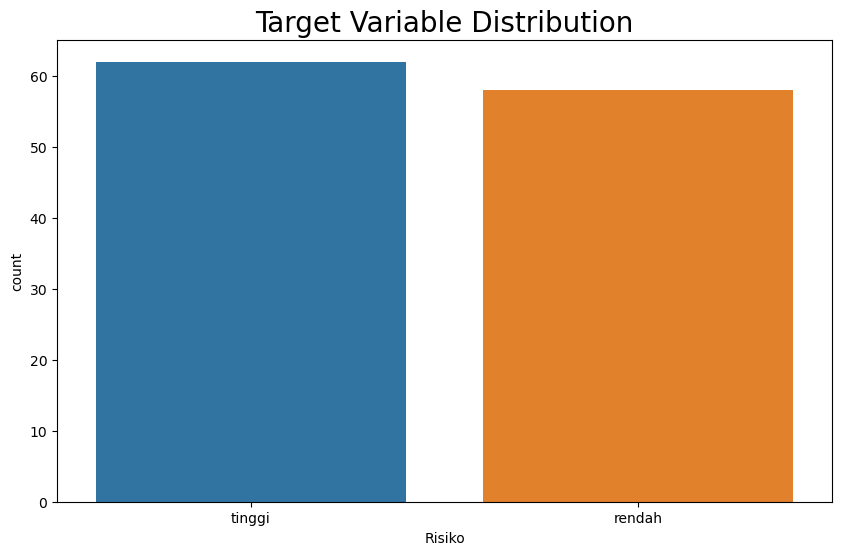

In [10]:
#Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.countplot(df, x="Risiko")
plt.title("Target Variable Distribution", fontsize=20)
plt.show()

In [11]:

# Data Preparation for Modeling
df = pd.DataFrame(df)
X = df[['Catatan_kredit', 'Utang', 'Jaminan','Pendapatan']]
y = df["Risiko"]


In [12]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp
)
print("The Shape of the Train Set is: ", X_train.shape)
print("The Shape of the Validation Set is: ", X_val.shape)
print("The Shape of the Test Set is: ", X_test.shape)

The Shape of the Train Set is:  (76, 4)
The Shape of the Validation Set is:  (20, 4)
The Shape of the Test Set is:  (24, 4)


In [13]:
# Define the dataframes for train, test, and validation sets
train_df = pd.DataFrame(X_train.head(5))
test_df = pd.DataFrame(X_test.head(5))
val_df = pd.DataFrame(X_val.head(5))

# Print the formatted table for the Train Set
print("Example entry of the Train Set:")
print(train_df.to_string(index=False))
print()

# Print the formatted table for the Test Set
print("Example entry of the Test Set:")
print(test_df.to_string(index=False))
print()

# Print the formatted table for the Validation Set
print("Example entry of the Validation Set:")
print(val_df.to_string(index=False))


Example entry of the Train Set:
 Catatan_kredit  Utang  Jaminan  Pendapatan
              2      1        0           1
              0      0        0           0
              0      1        1           0
              2      1        1           0
              1      1        1           2

Example entry of the Test Set:
 Catatan_kredit  Utang  Jaminan  Pendapatan
              2      0        0           2
              1      1        0           0
              0      1        1           0
              1      0        0           1
              1      0        1           1

Example entry of the Validation Set:
 Catatan_kredit  Utang  Jaminan  Pendapatan
              0      1        0           1
              1      0        1           1
              0      1        0           1
              2      1        0           2
              0      1        0           1


In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Misalkan X dan y adalah dataset kamu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Inisialisasi SelectKBest
k_best = SelectKBest(f_classif, k=4)  # Sesuaikan k dengan jumlah fitur yang diinginkan

# Fit dan transformasi pada data pelatihan
X_train_selected = k_best.fit_transform(X_train, y_train)

# Transformasi pada data pengujian
X_test_selected = k_best.transform(X_test)

# Inisialisasi model klasifikasi (contoh: KNeighborsClassifier)
clf = KNeighborsClassifier()

# Melatih model pada data yang telah diseleksi
clf.fit(X_train_selected, y_train)

# Prediksi pada data pengujian yang telah diseleksi
y_pred = clf.predict(X_test_selected)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.625


In [15]:
# Menampilkan hasil nilai prediksi dan aktual menggunakan DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual Predicted
95   rendah    tinggi
54   rendah    rendah
59   tinggi    rendah
117  rendah    tinggi
77   tinggi    tinggi
46   rendah    tinggi
31   tinggi    tinggi
81   rendah    tinggi
48   rendah    rendah
98   rendah    rendah
97   rendah    rendah
99   rendah    tinggi
2    rendah    tinggi
92   rendah    rendah
113  rendah    rendah
56   tinggi    tinggi
106  tinggi    rendah
103  tinggi    tinggi
67   tinggi    tinggi
62   rendah    rendah
112  rendah    rendah
17   tinggi    tinggi
83   tinggi    rendah
108  tinggi    tinggi


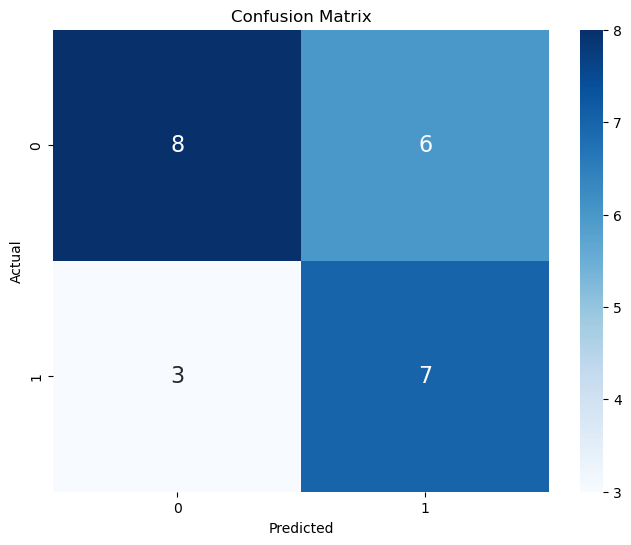

Classification Report:
              precision    recall  f1-score   support

      rendah       0.73      0.57      0.64        14
      tinggi       0.54      0.70      0.61        10

    accuracy                           0.62        24
   macro avg       0.63      0.64      0.62        24
weighted avg       0.65      0.62      0.63        24



In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap untuk Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)

# Menampilkan Classification Report
print("Classification Report:")
print(report)